# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I am a frequent flyer with BA ...
1,Not Verified | Flew with BA to Punta Cana. To...
2,✅ Trip Verified | They downgraded me from bu...
3,✅ Trip Verified | The already delayed aircra...
4,✅ Trip Verified | Caught up in the Gatwick c...


In [8]:
df.to_csv("dataset.csv")

In [9]:
df['reviews'] = df['reviews'].str.strip()
df['reviews'] = df['reviews'].str.replace('Trip Verified \|', '').str.replace('✅', '')
df['reviews'] = df['reviews'].str.replace('Not Verified \|  ', '')

<ipython-input-9-a67a6d0076dc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('Trip Verified \|', '').str.replace('✅', '')
<ipython-input-9-a67a6d0076dc>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('Not Verified \|  ', '')


In [10]:
df['reviews'] = df['reviews'].str.lower()

In [12]:
import spacy
import pandas as pd

# Load the English language model
nlp = spacy.load("en_core_web_sm")

adjectives_list = []
adverbs_list = []
proper_noun_list = []
for review in df['reviews']:
    doc = nlp(review)
    adjectives = [token.text for token in doc if token.pos_ == "ADJ"]
    adverbs = [token.text for token in doc if token.pos_ == "ADV"]
    proper_noun = [token.text for token in doc if token.pos_ == "PROPN"]
    adjectives_list.append(adjectives)
    adverbs_list.append(adverbs)
    proper_noun_list.append(proper_noun)

In [13]:
adj = sum(adjectives_list, [])
adv = sum(adverbs_list, [])
prop = sum(proper_noun_list, [])

In [14]:
adjective_data = pd.DataFrame(adj, columns=['adjective'])
adverb_data = pd.DataFrame(adv, columns=['adverb'])
proper_data = pd.DataFrame(prop, columns=['proper'])

In [28]:
top_20_adj = adjective_data['adjective'].value_counts().sort_values(ascending=False).head(15).reset_index()
top_20_adv = adverb_data['adverb'].value_counts().sort_values(ascending=False).head(15).reset_index()
top_20_proper = proper_data['proper'].value_counts().sort_values(ascending=False).head(15).reset_index()

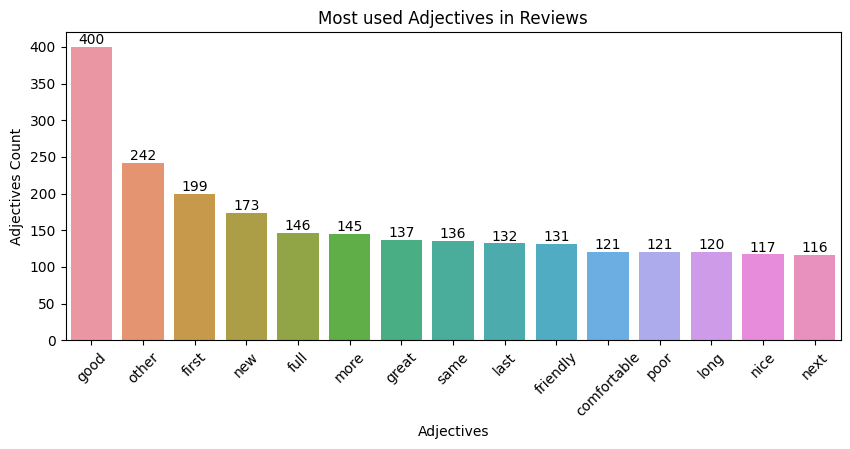

In [33]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=top_20_adj, x='index', y='adjective')
plt.xticks(rotation=45)
plt.xlabel('Adjectives')
plt.ylabel('Adjectives Count')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Most used Adjectives in Reviews")
plt.show()

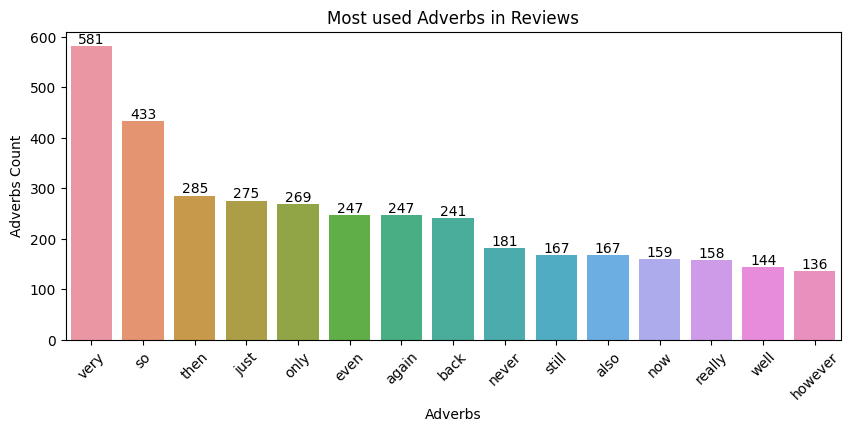

In [34]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=top_20_adv, x='index', y='adverb')
plt.xticks(rotation=45)
plt.xlabel('Adverbs')
plt.ylabel('Adverbs Count')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Most used Adverbs in Reviews")
plt.show()

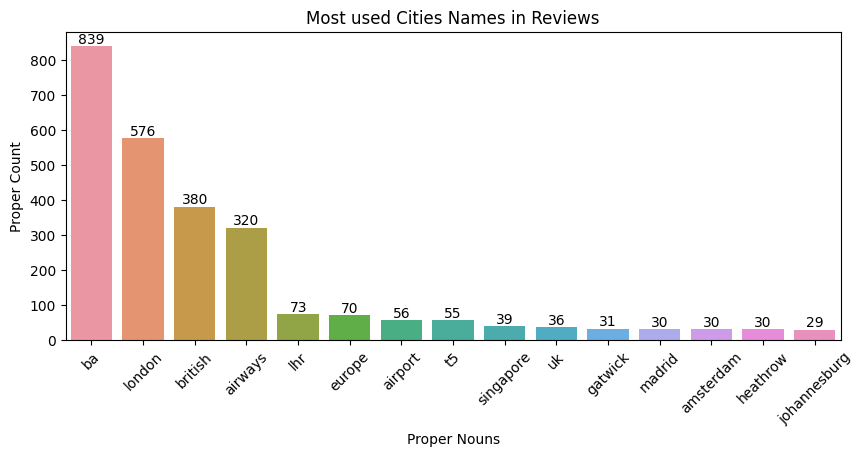

In [36]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=top_20_proper, x='index', y='proper')
plt.xticks(rotation=45)
plt.xlabel('Proper Nouns')
plt.ylabel('Proper Count')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Most used Cities Names in Reviews")
plt.show()

In [20]:
reviews = list()
reviews.append(adj)
reviews = sum(reviews, [])
reviews = str(reviews)

In [21]:
reviews

'[\'frequent\', \'last\', \'most\', \'physical\', \'elderly\', \'short\', \'useful\', \'valuable\', \'pre\', \'-\', \'boarding\', \'excellent\', \'such\', \'qatar\', \'true\', \'executive\', \'recent\', \'deserving\', \'attached\', \'recent\', \'itinerary\', \'same\', \'inbound\', \'less\', \'good\', \'other\', \'particular\', \'less\', \'second\', \'shoddy\', \'least\', \'fair\', \'insulting\', \'painful\', \'recent\', \'back\', \'honest\', \'actual\', \'warm\', \'friendly\', \'helpful\', \'medieval\', \'small\', \'wrong\', \'interior\', \'reminiscent\', \'ba\', \'tight\', \'uncomfortable\', \'luxurious\', \'ba\', \'unknown\', \'slow\', \'usual\', \'tiny\', \'officious\', \'senior\', \'mid\', \'uncomfortable\', \'worse\', \'happy\', \'gatwick\', \'smooth\', \'unable\', \'ba\', \'unable\', \'little\', \'real\', \'predicament-\', \'difficult\', \'real\', \'small\', \'own\', \'subsequent\', \'other\', \'incoming\', \'late\', \'new\', \'wet\', \'wet\', \'worst\', \'possible\', \'entire\',

In [22]:
reviews = reviews.replace('\\', '')
reviews = reviews.replace('\'', '')

In [24]:
!wget --quiet https://cdn.vectorstock.com/i/1000x1000/93/34/simple-black-plane-icon-on-white-background-vector-10919334.webp


In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

stopwords = set(STOPWORDS)
mask = np.array(Image.open('simple-black-plane-icon-on-white-background-vector-10919334.webp'))

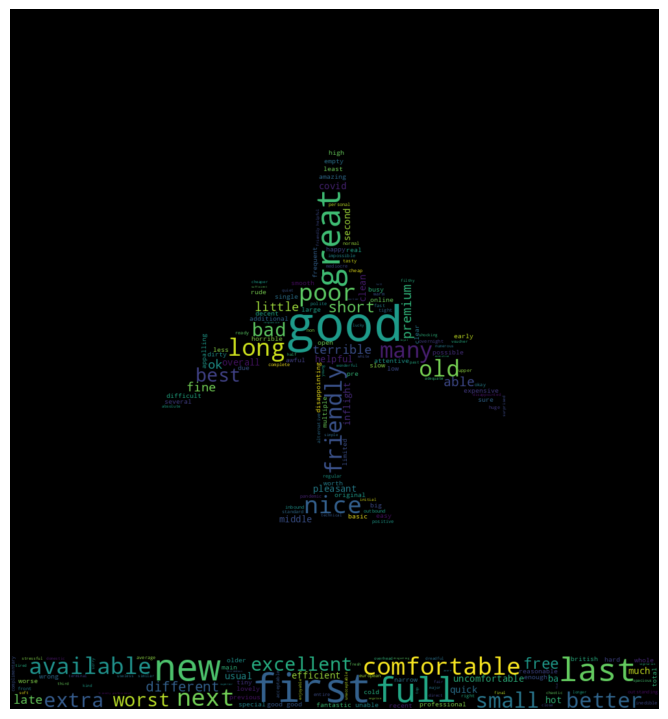

In [38]:
plt.figure(figsize=(12,7))
wordcloud = WordCloud(stopwords = stopwords, mask = mask, background_color = 'black').generate(''.join(reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()